/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.semi_supervised.label_propagation module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.semi_supervised. Anything that cannot be imported from sklearn.semi_supervised is now part of the private API.
  warnings.warn(message, FutureWarning)


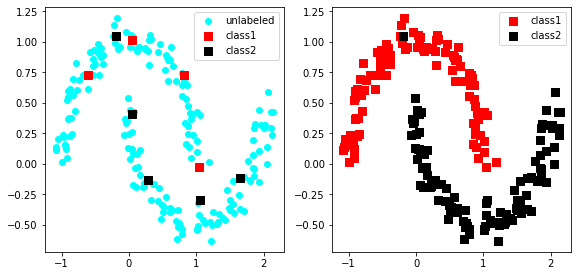

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import label_propagation
from sklearn.datasets import make_moons

n_samples = 200
X, y = make_moons(n_samples=n_samples, shuffle=False, noise=0.08, random_state=5)
class1, class2 = 1, 2
labels = -np.ones(n_samples)

for i in range(4):
    labels[int(i*n_samples/8)] = class1
    labels[int((i+4)*n_samples/8)] = class2

labels[int(n_samples/4+1)] = class2    
label_spread = label_propagation.LabelPropagation(kernel='rbf')

label_spread.fit(X, labels)

output_labels = label_spread.transduction_
plt.figure(figsize=(8.5, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='aqua',
            marker='o', label='unlabeled')
plt.scatter(X[labels == class1, 0], X[labels == class1, 1], color='red',
            marker='s', label="class1", s=50)
plt.scatter(X[labels == class2, 0], X[labels == class2, 1], color='black',
            marker='s',  label='class2', s=50)
plt.legend(scatterpoints=1, shadow=False, loc='upper right')

plt.subplot(1, 2, 2)
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == class1)[0]
inner_numbers = np.where(output_label_array == class2)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='red',
            marker='s',  s=50, label="class1")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='black',
            marker='s', s=50, label="class2")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()